# 2장 파이썬 속성 강좌

## 2.2 기본기에서 한 걸음 나아가기

### 2.2.7 함수형 도구

In [1]:
def exp(base, power):
    return base ** power

밑을 2로 하는 지수 함수를 정의할 때 아래와 같이 <font color='red'>기존 함수를 호출</font>하는 방식으로 정의할 수 있습니다.

In [2]:
def two_to_the_by_call(power):
    return exp(2, power)

또는 functools.partial을 이용하면 기존 함수의 특정 부분을 이용하여 <font color='red'>새로운 함수를 만드는 것</font>이 가능합니다.

In [3]:
from functools import partial

two_to_the_by_new = partial(exp, 2)
print(two_to_the_by_new(3))

8


`exp()` 함수를 수정하고 실행해 보면 호출 방식과 새로운 함수 생성 방식의 차이를 확인할 수 있습니다.

In [4]:
def exp(base, power):
    return base ** power + 1

print(two_to_the_by_call(3))
print(two_to_the_by_new(3))

9
8


# 4장 선형대수

## 4.1 벡터

In [5]:
v = [1, 2, 3]
w = [4, 5, 6]

def vector_add(v, w):
    return [v_i + w_i for v_i, w_i in zip(v, w)]

vector_add(v, w)

[5, 7, 9]

In [6]:
def vector_subtract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v, w)]

vector_subtract(v, w)

[-3, -3, -3]

In [7]:
from functools import reduce

def vector_sum(vectors):
    return reduce(vector_add, vectors)
    
vector_sum([v, w])

[5, 7, 9]

In [8]:
from functools import partial

vector_sum = partial(reduce, vector_add)

vector_sum([v, w])

[5, 7, 9]

In [9]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

In [10]:
def vector_mean(vectors):
    return scalar_multiply(1/len(vectors), vector_sum(vectors))

vector_mean([v, w])

[2.5, 3.5, 4.5]

In [11]:
v1 = [1, 2, 3]
v2 = [4, 5, 6]

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

dot(v1, v2)

32

In [12]:
def sum_of_squares(v):
    return dot(v, v)

import math

def magnitude(v):
    return math.sqrt(dot(v, v))

In [13]:
def distance(v, w):
    return magnitude(vector_subtract(v, w))

## 4.2 행렬

In [14]:
A = [[1, 2, 3],
     [4, 5, 6]]

In [15]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [16]:
def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

In [17]:
def make_matrix(num_rows, num_cols, entry_fn):
    [
        [entry_fn(i, j) for j in range(num_cols)] 
        for i in range(num_rows)
    ]

# 5장 통계

## 5.1 데이터셋 설명하기

### 5.1.1 중심 경향성

In [18]:
num_friends = [100, 49, 41, 40, 25]

In [19]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

51.0

### 5.1.2 산포도

In [20]:
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

de_mean(num_friends)

[49.0, -2.0, -10.0, -11.0, -26.0]

In [21]:
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum([x_i * x_i for x_i in de_mean(x)]) / len(x)

variance(num_friends)

660.4

In [22]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))
    
standard_deviation(num_friends)

25.69824896758532

# 8장 경사 하강법

## 8.1 경사 하강법에 숨은 의미

## 8.2 Gradient 계산하기

In [30]:
def difference_quotient(f, x, h):
    return (f(x+h) - f(x)) / h

In [31]:
def square(x):
    return x * x

def derivative(x):
    return 2 * x

In [32]:
derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

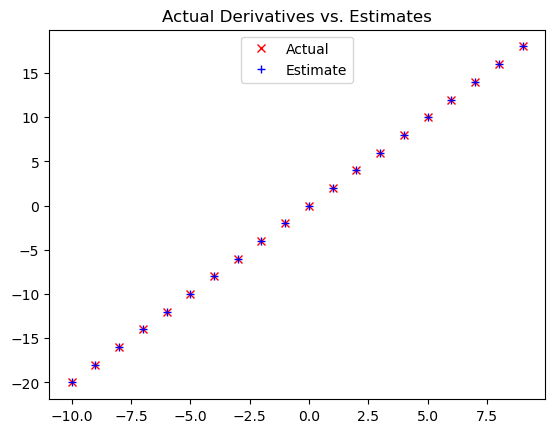

In [35]:
import matplotlib.pyplot as plt

x = range(-10, 10)
y = list(map(derivative, x))
y_estimate = list(map(derivative_estimate, x))

plt.title('Actual Derivatives vs. Estimates')
plt.plot(x, y, 'rx', label='Actual')
plt.plot(x, y_estimate, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

다변수 함수에 대한 편도함수를 구합니다.

In [44]:
def partial_difference_quotient(f, v, i, h=0.00001):
    w = [v_j + (h if i == j else 0) for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h

v = [random.randint(-10, 10) for i in range(3)]
print(v)
for i in range(len(v)):
    result = partial_difference_quotient(sum_of_squares, v, i)
    print(f'{[i]} {result}')

[-2, -2, -4]
[0] -3.999990000025377
[1] -3.999990000025377
[2] -7.999990000229217


In [46]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]

result = estimate_gradient(sum_of_squares, v)
print(result)

[-3.999990000025377, -3.999990000025377, -7.999990000229217]


## 8.3 Gradient 적용하기

경사하강법을 이용해서 3차원 벡터의 최솟값을 구해 봅니다.

In [29]:
import random

def step(v, direction, step_size):
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

v = [random.randint(-10, 10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v
    
print(v)

[3.5544203636441233e-06, -2.6658152727330933e-06, -2.2215127272775794e-06]


## 8.4 적절한 이동 거리 정하기

In [24]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    
    return safe_f

## 8.5 종합하기

모든 데이터에 대하여 함수를 최소화합니다.

In [25]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size) for step_size in step_sizes]
        
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

모든 데이터에 대하여 함수를 최대화 할 때는 목적 함수의 음수값을 최소화하면 됩니다. 결과적으로 gradient도 음수값입니다.

In [27]:
def negate(f):
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

In [47]:
def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn), negate_all(gradient_fn), theta_0, tolerance)

## 8.6 SGD(stochastic gradient descent)

In [48]:
def in_random_order(data):
    indices = [i for i, _ in enumerate(data)]
    random.shuffle(indices)
    for i in indices:
        yield data[i]

In [50]:
test_x = [11, 22, 33, 44, 55, 66, 77, 88, 99]
for x_i in in_random_order(test_x):
    print(x_i)

77
11
88
66
99
33
22
55
44


In [56]:
for i in range(2):
    for x_i in in_random_order(test_x):
        print(f'[{i}] {x_i}')

[0] 22
[0] 33
[0] 11
[0] 88
[0] 66
[0] 77
[0] 55
[0] 99
[0] 44
[1] 11
[1] 66
[1] 44
[1] 88
[1] 33
[1] 77
[1] 99
[1] 22
[1] 55


In [49]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = zip(x, y)
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float('inf')
    iterations_with_no_improvement = 0
    
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            iterations_with_no_improvement += 1
            alpha *= 0.9
            
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
            
    return min_theta

In [57]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn), negate_all(gradient_fn), x, y, theta_0, alpha_0)

# 10장 데이터 다루기

## 10.1 데이터 탐색하기

## 10.4 척도 조절

In [ ]:
# 각 열의 평균과 표준편차를 반환
def scale(data_matrix):
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix, j)) for j in range(num_cols)]
    stdevs = [standard_devication(get_column(data_matrix, j)) for j in range(num_cols)]
    return means, stdevs

## 10.5 차원 축소

In [ ]:
def de_mean_matrix(A):
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])

In [ ]:
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [ ]:
def directional_variance_i(x_i, w):
    return dot(x_i, w) ** 2

def directional_variance(X, w):
    return sum(directional_variance_i(x_i, w) for x_i in X)